Importing dependencies

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
#Loading dataset
df = pd.read_csv(r'C:\Users\jnira\OneDrive\Desktop\Lab work academics\ML Lab Assignments\Assignment 7\admission - admission.csv')

In [33]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [35]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [36]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         500 non-null    int64  
 1   GREScore          500 non-null    int64  
 2   TOEFLScore        500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [38]:
# Preprocessing on ChanceofAdmit column
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [39]:
df

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0
496,497,337,117,5,5.0,5.0,9.87,1,1.0
497,498,330,120,5,4.5,5.0,9.56,1,1.0
498,499,312,103,4,4.0,5.0,8.43,0,0.0


In [41]:
(df==1).sum()

SerialNo.             1
GREScore              0
TOEFLScore            0
UniversityRating     34
SOP                   6
LOR                   1
CGPA                  0
Research            280
ChanceofAdmit       155
dtype: int64

In [47]:
#Dividing dataset into X and y
X = df.drop(['ChanceofAdmit','SerialNo.'],axis= 1)
y = df['ChanceofAdmit']

In [48]:
# Splitting training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [50]:
#Fitting data into model by making clf object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [56]:
confusion_matrix(y_pred,y_test)

array([[61,  5],
       [ 8, 26]], dtype=int64)

In [57]:
print("1. Accuracy Score:", accuracy_score(y_test, y_pred))
print("2. Precision Score:",precision_score(y_test, y_pred))
print("3. Recall Score:", recall_score(y_test, y_pred))
print("4. f1 Score:", f1_score(y_test, y_pred))

1. Accuracy Score: 0.87
2. Precision Score: 0.7647058823529411
3. Recall Score: 0.8387096774193549
4. f1 Score: 0.7999999999999999


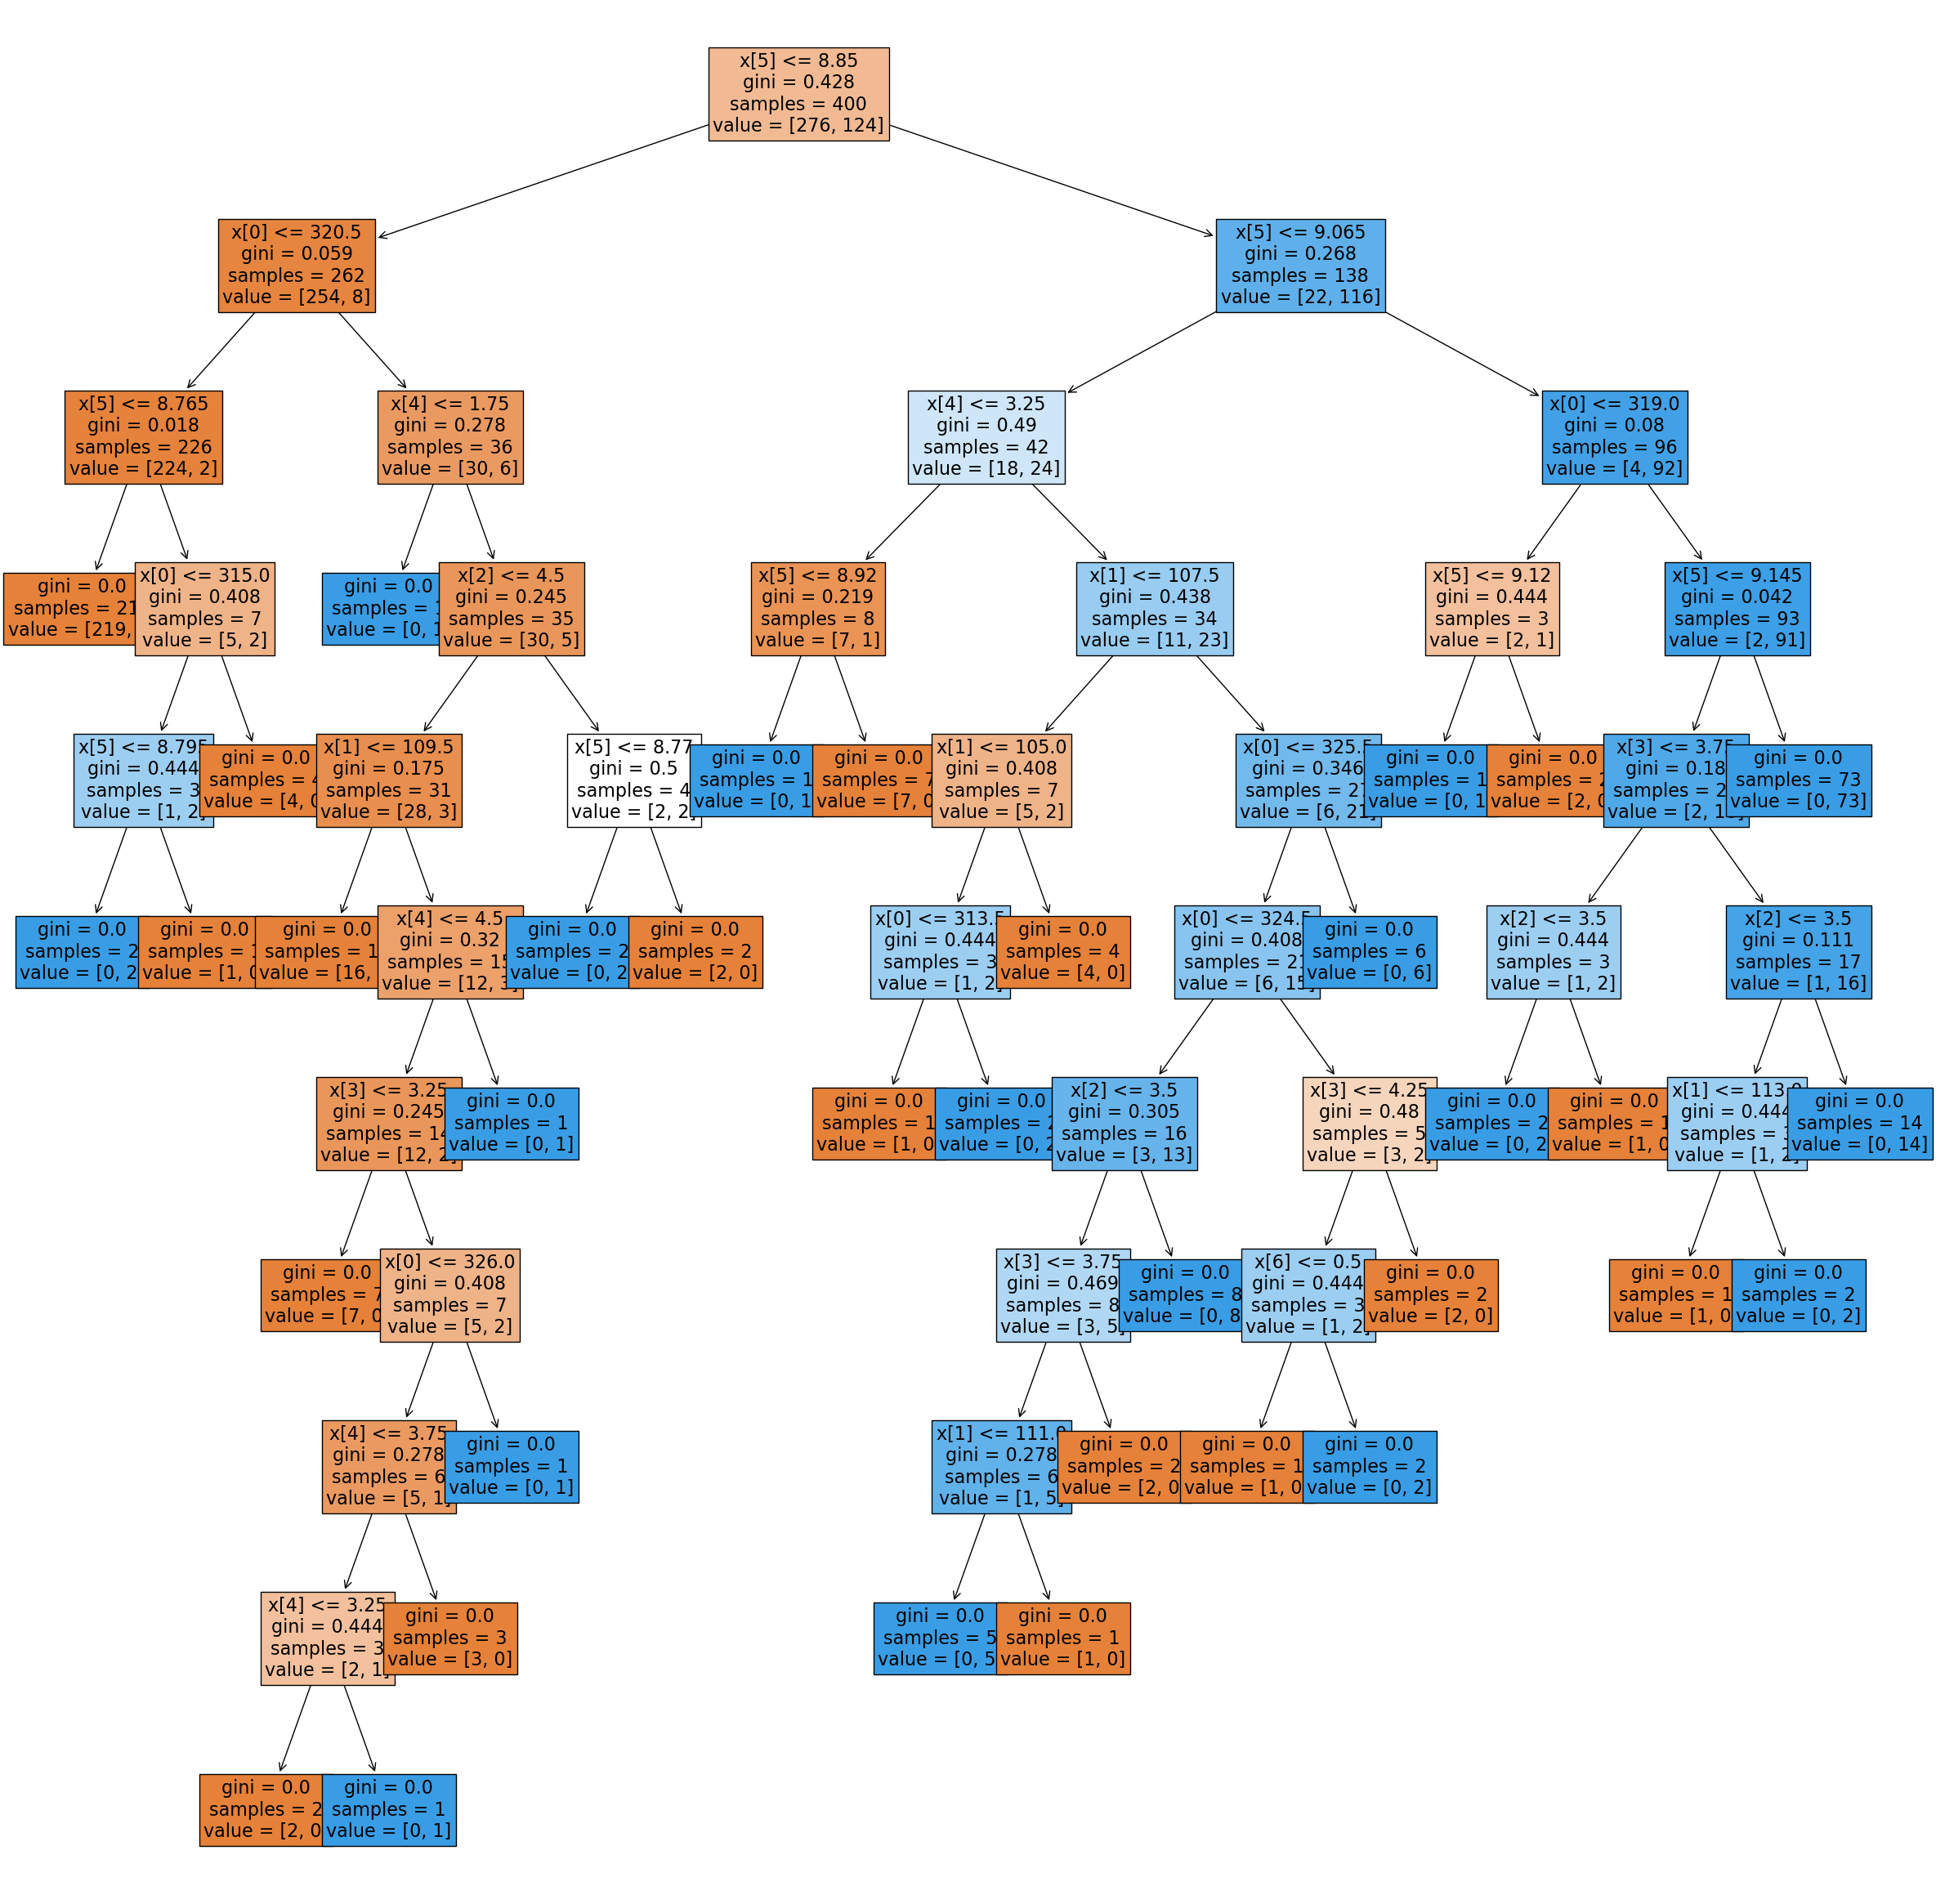

In [63]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled = True, fontsize = 16)
plt.show()

In [64]:
clf.score(X_test, y_test)

0.87